# 1-Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import display
from collections import Counter,deque
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# preprocessing the data

<h1>2-Load dataset and explore the data</h1>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [3]:
pd.set_option('display.max_columns', None)
# load dataset
df = pd.read_csv('diabetic_data.csv')

#define some varibales
target_column = 'readmitted'
# Data analysis to gain insights into the dataset
display(df.head(5))
print(df.shape)
print("--------------------")
display(df.info())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


(101766, 50)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures           

None

<h1>3-Handle missing value</h1>

In [4]:
# Separate traget value column from features

#check whether each columns has distinct value or not?
nunique_columns =  df.loc[:, df.nunique() == 1].columns
print(f"All values of these columns are the same {np.array(nunique_columns)}")

#Remove the columns that all of their values are the same
df_dropped = df.drop(np.array(nunique_columns),axis=1)

#Remove ids' column from the dataset
df_dropped = df_dropped.drop('encounter_id',axis=1)
df_dropped = df_dropped.drop('patient_nbr',axis=1)
print(f"After dropping (id columns)\nNumber of rows: {len(df_dropped)},Number of columns: {len(df_dropped.columns)}")

#replace undefined value with NaN
df_replaced = df_dropped.replace('?',np.nan)
df_replaced = df_replaced.replace('None',np.nan)

#drop columns with large number of Nan (more than 40%)
missing_columns =df_replaced.columns [((df_replaced.isnull()).sum() > 0.39 * len(df_replaced))].values
df_dropped = df_replaced.drop(missing_columns,axis=1)
print(f"\nAfter dropping (miss value column)\nNumber of rows: {len(df_dropped)},Number of columns: {len(df_dropped.columns)}")

#number of missing value in each column
nan_counts = df_dropped.isnull().sum()
print(f"\nTotal number of missing value in dataset {(nan_counts[nan_counts.index].values).sum()}")

"""
total number of missing value is 4075. it's about 0.03 of total data,
so it can be good to remove these rows
"""
df_dropped.dropna(inplace=True)
print(f"\nAfter dropping (nan rows)\nNumber of rows: {len(df_dropped)},Number of columns: {len(df_dropped.columns)}")

# Label endoding to convert non-number columns to the number columns
pl = preprocessing.LabelEncoder()
df_encoder = df_dropped.apply(pl.fit_transform)
display(df_encoder.head())


# ---------------------------------------------------------------------------------------------
#find categorial columns

# Calculating correlation to remove some useless columns


# correlation = df_encoder.corrwith(df_encoder['readmitted'])
# print(correlation)

# print(df_dropped.nunique())
df = df_encoder.copy()

All values of these columns are the same ['examide' 'citoglipton']
After dropping (id columns)
Number of rows: 101766,Number of columns: 46

After dropping (miss value column)
Number of rows: 101766,Number of columns: 41

Total number of missing value in dataset 4075

After dropping (nan rows)
Number of rows: 98053,Number of columns: 41


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,1,0,0,6,2,58,0,17,0,0,0,143,77,121,6,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,3,1,0,0,0,0,0,1,1
2,0,0,2,0,0,6,1,10,5,12,2,0,1,454,76,763,3,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,2
3,2,1,3,0,0,6,1,43,1,15,0,0,0,553,95,248,4,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,3,1,0,0,0,0,0,1,2
4,2,1,4,0,0,6,0,50,0,7,0,0,0,54,23,86,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,2,1,0,0,0,0,0,1,2
5,2,1,5,1,0,1,2,30,6,15,0,0,0,263,244,86,6,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,2,1,0,0,0,0,1,1,1


<h1>4- Split dataset</h1>

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


df_train,df_test = train_test_split(df,test_size = 0.1,random_state=50)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=50)


# building decision tree using our code

<h1>5- Decision tree models</h1>

In [ ]:
class Node(object):
    def __init__(self, value, node_amounts, children, is_leaf=False):
        self.children = children
        self.is_leaf = is_leaf
        self.value = value
        self.node_amounts = node_amounts




def calculate_info(y=y_train):
    # count the repetition of each unique value
    count_unique_values = y.value_counts()

    # calculate probability of each unique value
    P_c = count_unique_values.values / len(y)
    info_s = -np.sum(P_c * np.log2(P_c))

    return info_s


def calculate_info_feature(feature, target):
    #   1- calculate info(S) according to the feature value
    column_group = [feature, target]
    # count the repetition of each unique value
    count_feature_unique_values = df_train[feature].value_counts().sort_index()  # for the feature column
    count_unique_values = df_train[column_group].value_counts()  # for feature and target column simultaneously

    """
    * calculate probabilty (P_c) According to each unique value of feature column

    * .index.get_level_values(feature) retrieves an array of feature values that
    each feature value is repeated based on the different unique target values it took
    """
    P_cs = (count_unique_values / count_unique_values.index.get_level_values(feature).map(count_feature_unique_values))
    info_s_is = P_cs.groupby(feature).apply(lambda x: -np.sum(x * np.log2(x)))

    #     2- calculate info_A(S)
    info_A = np.sum((count_feature_unique_values / len(df_train[feature]) * info_s_is))

    return info_A


def calculate_gain(feature, target='readmitted'):
    return calculate_info() - calculate_info_feature(feature, target)


# class Tree:
#     def __init__():
#         pass

# return the name of the best feature for the nex_node
def next_node(dataframe: pd.DataFrame) -> str:
    gain = 0
    max_gain = 0
    best_column = None
    for i in dataframe.columns.values:
        gain = calculate_gain(i)
        if (gain > max_gain):
            max_gain = gain
            best_column = i
    return best_column


# Checks whether a node is a leaf or not
def is_leaf(dataframe: pd.DataFrame, target: str = 'readmitted') -> bool:
    #     if all remain target values are the same
    if dataframe[target].nunique() == 1:
        return True
    #     if there is no more feature column to check. (==1) is for the target column
    elif (len(dataframe.columns) == 1):
        return True
    else:
        return False


# return appropriate value for a leaf
def leaf_value(target_column: pd.Series) -> int:
    return target_column.value_counts().idxmax()


def generateTree():
    dataframe_copy = df_train.copy()

    question = next_node(X_train)
    question_node = Node(value=question, node_amounts=dataframe_copy[question].unique(), children=dict())
    root = question_node

    ID3(root, dataframe_copy)
    return root


def ID3(node, df):
    for node_amount in node.node_amounts:
        temp_dataframe = df.loc[df[node.value] == node_amount]
        #     if all remain target values are the same
        #     or
        #     if there is no more feature column to check. (==1) is for the target column

        if temp_dataframe[target_column].nunique() == 1 or (len(temp_dataframe.columns) == 1):
            new_child = Node(is_leaf=True, value=leaf_value(temp_dataframe[target_column]), node_amounts=[],
                              children=dict())
            node.children[node_amount] = new_child

            if node_amount == node.node_amounts[-1]:
                return


        else:
            question = next_node(
                temp_dataframe[temp_dataframe.columns[~temp_dataframe.columns.isin([target_column, node.value])]])
            question_node = Node(value=question, node_amounts=temp_dataframe[question].unique(), children=dict())
            node.children[node_amount] = question_node


            temp_dataframe_copy = temp_dataframe.copy()
            temp_dataframe_copy = temp_dataframe_copy.drop(node.value, axis=1)

            ID3(question_node, temp_dataframe_copy)
    return

# call after generating the tree
def iterate_tree(node: Node, example):
    # start with the root of the tree
    while not node.is_leaf:
        # find the question that is asked in this layer
        question = node.value
        # iterate through all branches of the node
        for amount in node.node_amounts:
            # find the branch that the example belongs to
            if example[question] == amount:
                # move to the child
                node = node.children[amount]
                break
            elif amount == node.node_amounts[-1]:
                print(f'couldn\'t find the class of the example ---> stopped at {node.value} ')
                return -1
    if node.is_leaf:
        # return the class of the leaf
        return node.value

    return -1

# building a tree and evaluating

In [ ]:
# scikit learn decision tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.5932700506873931, 0.9891304347826086, 'x[12] <= 0.5\ngini = 0.578\nsamples = 88247\nvalue = [9974, 31242, 47031]'),
 Text(0.3083372130884166, 0.967391304347826, 'x[16] <= 2.5\ngini = 0.529\nsamples = 58119\nvalue = [4973, 17759, 35387]'),
 Text(0.0709281901945635, 0.9456521739130435, 'x[5] <= 5.5\ngini = 0.458\nsamples = 12725\nvalue = [850, 3056, 8819]'),
 Text(0.04221787197909366, 0.9239130434782609, 'x[10] <= 0.5\ngini = 0.422\nsamples = 6553\nvalue = [440, 1331, 4782]'),
 Text(0.029082367926478052, 0.9021739130434783, 'x[5] <= 2.5\ngini = 0.411\nsamples = 6026\nvalue = [408, 1159, 4459]'),
 Text(0.01274351282673813, 0.8804347826086957, 'x[32] <= 0.5\ngini = 0.43\nsamples = 4536\nvalue = [311, 951, 3274]'),
 Text(0.002923386824080432, 0.8586956521739131, 'x[13] <= 503.0\ngini = 0.557\nsamples = 291\nvalue = [31, 93, 167]'),
 Text(0.002331682005086616, 0.8369565217391305, 'x[9] <= 40.5\ngini = 0.578\nsamples = 250\nvalue = [29, 87, 134]'),
 Text(0.002288016270390041, 0.815217

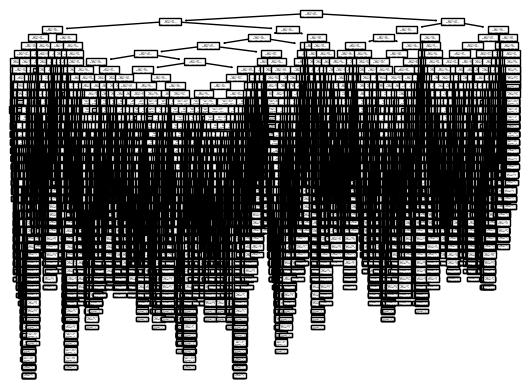

In [ ]:
tree.plot_tree(clf)

In [ ]:
# checking the accuracy of the model using test set
count=0
for i in range(len(df_test)):
    predicted = clf.predict_proba(X_test.iloc[[i]])
    predicted = np.where(predicted == 1)[1][0]
    if(predicted != y_test.iloc[i]):
        count+=1

print(f'test dataset was classified with {1-count/len(df_test)}% accuracy')

test dataset was classified with 0.4809300428309199% accuracy


In [ ]:
# checking the accuracy of the model using test set
count=0
for i in range(len(df_test)):
    predicted = clf.predict(X_test.iloc[[i]])[0]
    if(predicted != y_test.iloc[i]):
        count+=1

print(f'test dataset was classified with {1-count/len(df_test)}% accuracy')

test dataset was classified with 0.4809300428309199% accuracy


# building trees and evaluating using random forest

In [ ]:
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
# checking the accuracy of the model using test set
count=0
for i in range(len(df_test)):
    predicted = clf.predict(X_test.iloc[[i]])[0]
    if(predicted != y_test.iloc[i]):
        count+=1

print(f'test dataset was classified with {1-count/len(df_test)}% accuracy')

test dataset was classified with 0.5639404446257393% accuracy


# tree pruning

In [6]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
ccp_alphas = ccp_alphas[-50:]
impurities = impurities[-50:]

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

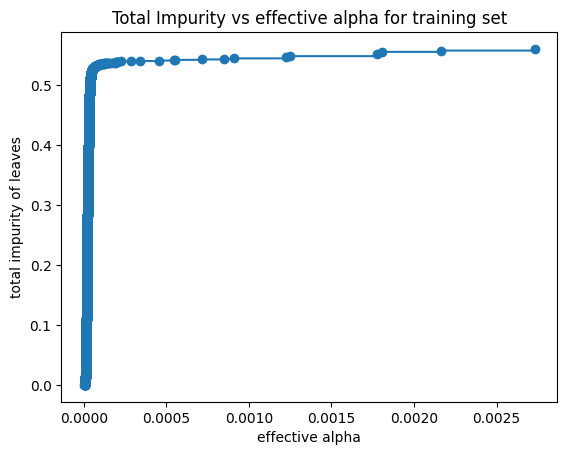

In [7]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [25]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    print(ccp_alpha)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[-10])
# clf.fit(X_train, y_train)

8.345468898427605e-05
8.369569158631247e-05
8.391151019618986e-05
8.628674384690734e-05
8.859843841684846e-05
9.036918076599405e-05
9.144012979123498e-05
9.351508277351608e-05
9.404068009172088e-05
9.456827745702194e-05
0.00010011319844395548
0.00010052241293143256
0.00010262345956863275
0.00010279905309133752
0.00010310145198408338
0.00010988297420539642
0.0001164836541736377
0.00012035740119914137
0.00012473689794429213
0.00012522691123130827
0.00012606921006723393
0.0001312326136795952
0.00013836853869882842
0.00014297104289628243
0.0001485644978496941
0.00015466539629747228
0.00016277953617233054
0.0001862241492459754
0.00018759147225915623
0.00019076920656422441
0.000200847142421268
0.00020141803636085365
0.00020225483730948457
0.00020310244425296442
0.00022420493967726003
0.0002866404076734691
0.00034236028151038433
0.00045246213402616586
0.000544993699348767
0.0005521567105564729
0.0007137854188292159
0.0008480027870288037
0.0009081450371428712
0.0012265599077817477
0.0012459734

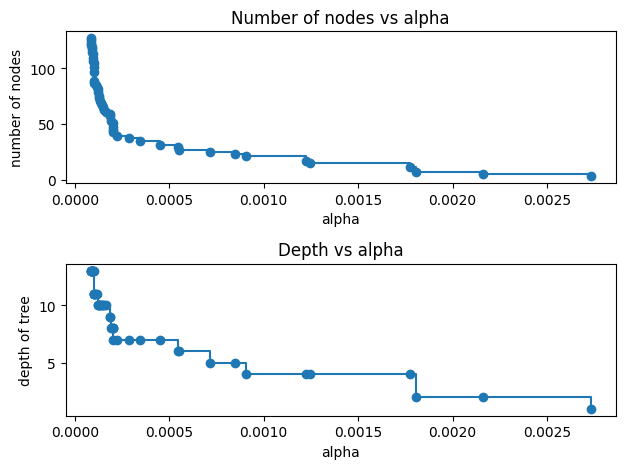

In [27]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

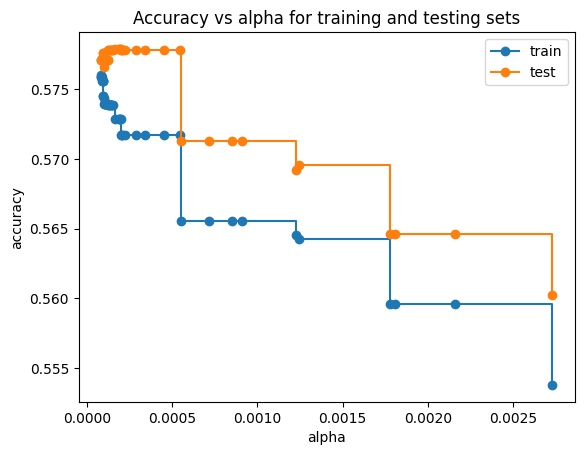

In [28]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# evaluating using our code

In [ ]:
# check the model using our code
root = generateTree()
for i in range(len(df_test)):
#   create an example with the features in a row of dataset
    example = dict()
    for col in df_test:
        example[col] = df_test.iloc[i][col]

#     iterate the tree to classify the exmaple
    tree_res = iterate_tree(root, example)
#     get the true class of the example
    df_res = df_test.iloc[i][target_column]
#     check if the model predicted the correct class
    if(tree_res != tree_res):
        print(f'i = {i}')